# Ondas y Señales
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Redes</code></p>

## Reconociendo el entorno de Jupyter Notebook
Jupyter Notebook es una aplicación web de código abierto que facilita la computación interactiva y colaborativa en docenas de lenguajes de programación, incluidos Python, R y julia; tres lenguajes muy populares entre los científicos de datos en la actualidad.

### Agenda
1. Ondas
1. Señales análogas
1. Señales digitales
1. Ancho de banda 

In [366]:
# Importar módulos al cuaderno
import numpy as np
import matplotlib.pyplot as plt

# Importar elementos de un módulo al cuaderno
from matplotlib.ticker import AutoMinorLocator, FixedLocator
from math import pi, floor
from numpy import sin

## 1. Ondas
---
Una [onda][1] representa la propagación de una perturbación de alguna propiedad física del espacio

[1]:https://es.wikipedia.org/wiki/Onda

### 1.1. Descripción matemática
Toda onda periódica puede ser descrita matemáticamente por la ecuación diferencial

$$ \frac{\partial ^2 f(x,t)}{\partial x^2}=\frac{1}{v^2} \frac{\partial ^2 f(x,t)}{\partial t^2} $$

Cuya solución son las funciones de la forma

$$ f(x,t) = A(x,t) \cdot sin( \omega t - kx + \theta) $$

donde:

* $ k = \dfrac{w}{v_f} $ <code> es el numero de onda</code>.
* $ \omega = 2 \pi f =\dfrac{2 \pi v_f}{\lambda}$ <code >es la frecuencia angular</code>.
* $ f =\dfrac{v_f}{\lambda} $ <code >es la frecuencia temporal</code>.
* $ \theta $ <code >es la fase</code>.

-------------------------------------------------------
 Frecuencia de la portadora:                2.5 Khz
 Periodo de la portadora:                   0.4 ms
 Fase de la portadora:                      4.7 rad
 Frecuencia angular de la portadora:   15,708.0 rad/s
 Longitud de onda de la portadora:          0.1 mts
-------------------------------------------------------


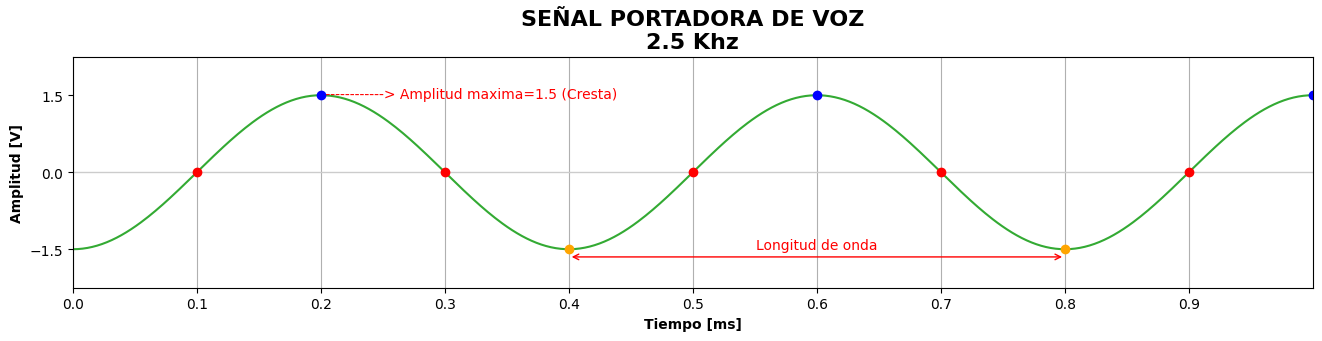

In [449]:
# Caracterización de una onda (Voz)
# ---------------------------------------------------------
f = 2_500           # Frecuencia de la onda voz (3400)
A = 1.5             # Amplitud de la onda (40 dB)
θ = 3*pi/2           # Fase de la onda (2*π > θ > -2*π)
vf = 343.2          # Velocidad del sonido (propagación)
# ---------------------------------------------------------
w = 2 * pi * f      # Frecuencia angular de la onda
T = 1/f             # Periodo de la onda
λ = vf/f            # Longitud de onda de la portadora
# ---------------------------------------------------------
nλ = 2.5            # Número de longitudes de onda visibles
λ4 = int(4*nλ)      # Número de cuartos de longitudes de onda visibles (Entero>8)
to = -θ/w           # Tiempo inicio


# Puntos críticos de la función de onda
# ---------------------------------------------------------
nodo = to
cresta = to+T/4
valle = to+3*T/4
if θ > 0:
    while nodo < T/100:
        nodo = nodo + T/2

    while cresta < T/100:
        cresta = cresta + T

    while valle < T/100:
        valle = valle + T

if θ < 0:
    while nodo > -T/100:
        nodo = nodo - T/2

    while cresta > -T/100:
        cresta = cresta - T

    while valle > -T/100:
        valle = valle - T

    nodo = nodo + T/2
    cresta = cresta + T
    valle = valle + T
# ---------------------------------------------------------
num_nodos = floor(λ4/2)
num_crestas = floor(λ4/4+1)
num_valles = floor(λ4/4+1)
críticos = np.linspace(min(nodo, cresta, valle), nλ/f+to, λ4+1, endpoint=True)
nodos = np.linspace(nodo, nodo+(T/2) * (num_nodos-1), num_nodos, endpoint=True)
crestas = np.linspace(
    cresta, cresta + T*(num_crestas-1), num_crestas, endpoint=True)
valles = np.linspace(
    valle, valle + T*(num_valles-1), num_valles, endpoint=True)


# Salida estándar
# ---------------------------------------------------------
print(55*"-")
print(f" Frecuencia de la portadora:            {f/1_000:7.1f} Khz")
print(f" Periodo de la portadora:               {1000*T:7.1f} ms")
print(f" Fase de la portadora:                  {θ:7.1f} rad")
print(f" Frecuencia angular de la portadora:   {round(w):,.1f} rad/s")
print(f" Longitud de onda de la portadora:      {λ:7.1f} mts")
print(55*"-")


'''# Máximos y nodos de la onda
nodos = np.array([críticos[i] for i in range(len(críticos)) if i % 2 == 0])
máximos = np.array([críticos[i] for i in range(len(críticos)) if i % 2 != 0])
# crestas y valles de la onda
crestas = np.array([máximos[i] for i in range(len(máximos)) if i % 2 == 0])
valles = np.array([máximos[i] for i in range(len(máximos)) if i % 2 != 0]) '''
# ---------------------------------------------------------


# Gráfica
# ----------------------------------------------------
# Un solo eje una sola gráfica - Señal portadora de voz
plt.figure(figsize=(16, 3))
# Vector de tiempo acorde a la frecuencia de la señal
t = np.linspace(0, nλ/f, 512, endpoint=True)
# Onda
y = A * sin(w*t + θ)
# linea horizontal
plt.axhline(y=0, linewidth=1.0, color="#ccc")
# plt.axhline(y=-A*1.1, xmin=3/8, xmax=7/8, linewidth=1.0, color="#f00")

# Transformando t a ms
# ----------------------------------------------------
t *= 1_000
nodos *= 1_000
crestas *= 1_000
valles *= 1_000


# Marcas de los puntos críticos
# ----------------------------------------------------
plt.plot(t, y, color="#33aa33")


# Marcas de los puntos críticos
# ----------------------------------------------------
plt.plot(
    nodos, np.zeros(len(nodos)), color='red',
    marker='o', linestyle='None')
plt.plot(
    crestas, A*np.ones(len(crestas)),
    color='blue', marker='o', linestyle='None')
plt.plot(
    valles, -A*np.ones(len(valles)),
    color='orange', marker='o', linestyle='None')


# Limites y garrapatas
# ----------------------------------------------------
plt.xlim(t.min(), t.max())
plt.ylim(y.min()*1.5, y.max()*1.5)
plt.yticks([y.min(), 0, y.max()])
plt.xticks(np.arange(t.min(), t.max(), step=0.1))
plt.grid(axis="x", which="both")

# Textos en la gráfica
# ----------------------------------------------------
plt.title(
    "Señal portadora de voz\n".upper()
    + f"{f/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [ms]", fontweight="bold")
plt.ylabel("Amplitud [V]", fontweight="bold")
plt.text(
    crestas[0], y.max()*0.96,
    f" ------------> Amplitud maxima={A} (Cresta)", color="#ff0000")

plt.annotate(
    "", xy=(valles[0], -A*1.1), xytext=(valles[1], -A*1.1),
    arrowprops=dict(arrowstyle="<->", color="#f00"))

plt.text(
    (valles[1]+valles[0])/2, -A, f"Longitud de onda",
    horizontalalignment='center', color="#ff0000")

plt.show()

In [448]:
(to, nodo, cresta, valle)

(-0.0003,
 0.00010000000000000005,
 0.00020000000000000004,
 0.0004000000000000001)

## 2. Señales análogas
---
Antes de iniciar la ejecución del código debe escoger el núcleo o <code>Kernel</code> para la ejecución de dicho código; en este curso usaremos el lenguaje Python en su versión 3.8, pero también son posibles otros lenguajes de programación y versiones de Python como ya se mencionó anteriormente.

Puede elegir ejecutar celdas de diferentes maneras:
* Una celda individual
* Todas las celdas hacia abajo.
* Todas las celdas hacia arriba.
* Todas las celdas de código en un <code>Jupyter Notebook</code>.

>**NOTA:** siempre tenga en cuenta que si una celda no ha sido ejecutada sus resultados no estarán disponibles y entonces la ejecución de una celda que necesite esos datos puede fallar o dar resultados incorrectos.

----------------------------------------------
 Frecuencia de la portadora:         740.0 Khz
 Longitud de onda de la portadora:   405.1 mts
----------------------------------------------


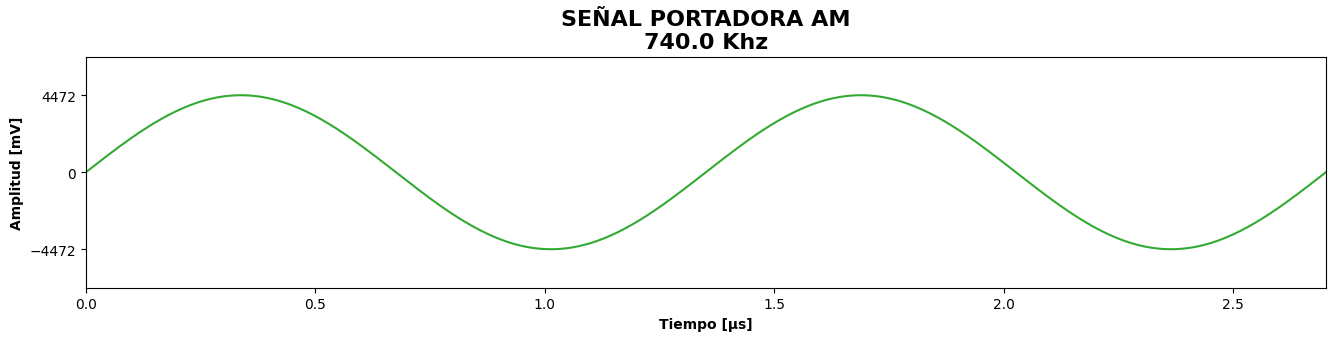

In [4]:
# [iPython] - Gráficas - Caracterización de una señal de AM
# ---------------------------------------------------------
# Ecos de pasto 740 Khz - AM - Onda media
fp = 740_000            # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
# Velocidad de la luz (propagación ondas electromagnéticas)
c = 299_792_458
# Potencia de un transmisor de 1 KW y antena de (50 Ω) - 100Km
Potencia = 1_000
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
λp = c/fp                # Longitud de onda de la portadora
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 2                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estándar
print(f"----------------------------------------------")
print(f" Frecuencia de la portadora:       {fp/1_000:7.1f} Khz")
print(f" Longitud de onda de la portadora: {λp:7.1f} mts")
print(f"----------------------------------------------")

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de AM
# ----------------------------------------------------
plt.figure(figsize=(16, 3))
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV
plt.plot(t, Sp, color="#33aa33")
# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*1.5)
plt.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
plt.title("Señal portadora AM\n".upper() +
          f"{fp/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mV]", fontweight="bold")
plt.show()

----------------------------------------------
 Frecuencia de la portadora:         101.1 Mhz
 Longitud de onda de la portadora:     3.0 mts
----------------------------------------------


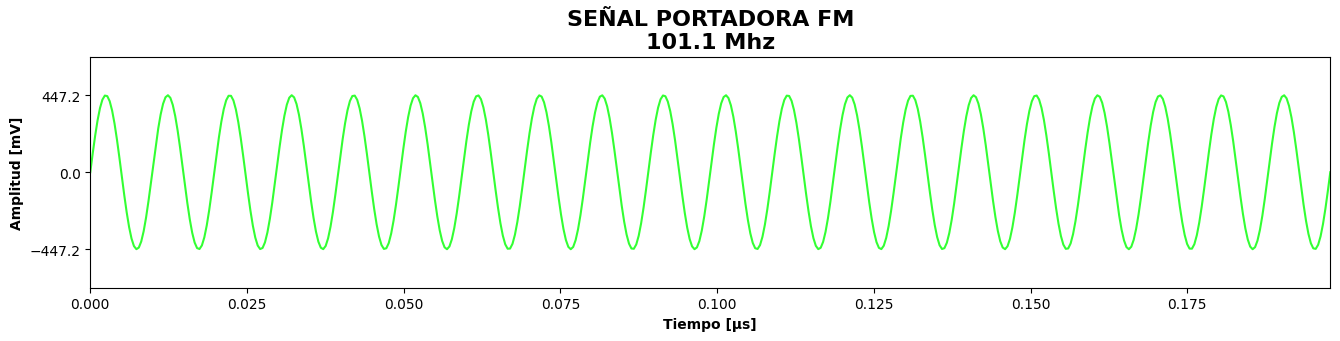

In [5]:
# [iPython] - Gráficas - Caracterización de una señal de FM
# ---------------------------------------------------------
# Emisora Universidad de Nariño 101.1 Mhz - FM
fp = 101_100_000        # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
# Potencia de un transmisor de 10 W y antena de (50 Ω - 10Km)
Potencia = 10
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 20                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estándar
print(f"----------------------------------------------")
print(f" Frecuencia de la portadora:       {fp/1_000_000:7.1f} Mhz")
print(f" Longitud de onda de la portadora: {299_792_458/fp:7.1f} mts")
print(f"----------------------------------------------")

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de FM
# ----------------------------------------------------
plt.figure(figsize=(16, 3))
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV
plt.plot(t, Sp, color="#33FF33")
# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*1.5)
plt.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
plt.title("Señal portadora FM\n".upper() +
          f"{fp/1_000_000:.1f} Mhz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mV]", fontweight="bold")
plt.show()

---
## Mas Recursos
- [Radio AM](https://es.wikipedia.org/wiki/Radio_AM) (Wikipedia)
- [Detector de envolvente](https://es.wikipedia.org/wiki/Detector_de_envolvente) (Wikipedia)
- [Detector de envolvente](https://oshwlab.com/giancarlobenavides/am_rx) (Esquemático)
- [AM Transmitter Specifications](https://broadcaststoreeurope.com/upload_dir/shop/Nautel-J1000-specs.pdf) 
(PDF)
